#Stroke Prediction Model 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Library Imports

In [ ]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

##Dataset Import

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BCU/Dissertation/healthcare-dataset-stroke-data.csv")

In [ ]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
#removing ID column as it is not useful for the prediction model
del data['id']
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
#Replace Gender labelled as Other as NULL
data ['gender'] = data['gender'].replace(['Other'], np.nan)

In [ ]:
#Find missing data within the dataset
data.isnull().sum()

gender                 1
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#Removing missing value as imputing the BMI column with Average/Mean value will make the model skewed or bias
data = data.dropna()

In [ ]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#Data Pre-processing

In [ ]:
#handling categorical varaible using Label Encoding for Ever married and Residence Type
label_encoder = LabelEncoder()
data.loc[:,"ever_married"] = label_encoder.fit_transform(data.loc[:,"ever_married"])
data.loc[:,"Residence_type"] = label_encoder.fit_transform(data.loc[:,"Residence_type"])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
x_feature = data.drop(['stroke'], axis = 1)
y_feature = data['stroke']

In [ ]:
print('Shape of X: ', x_feature.shape)
print('Shape of Y: ', y_feature.shape)

Shape of X:  (4908, 10)
Shape of Y:  (4908,)


In [ ]:
onehotEn = OneHotEncoder()
columntrans = ColumnTransformer(transformers= [('encoder', onehotEn, [0,5,9])], remainder = 'passthrough')
x_transformed = columntrans.fit_transform(x_feature)

###Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_transformed, y_feature, test_size= 0.2, random_state= 42)

In [ ]:
print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of Y_test: ', y_test.shape)

Shape of X_train:  (3926, 18)
Shape of y_train:  (3926,)
Shape of X_test:  (982, 18)
Shape of Y_test:  (982,)


##Model Training

###Artificial Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = "relu"))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=10, epochs = 50)

Epoch 1/50
393/393 [==============================] - 1s 4ms/step - loss: 0.1622 - accuracy: 0.9564
Epoch 2/50
393/393 [==============================] - 1s 3ms/step - loss: 0.1715 - accuracy: 0.9544
Epoch 3/50
393/393 [==============================] - 1s 3ms/step - loss: 0.1768 - accuracy: 0.9557
Epoch 4/50
393/393 [==============================] - 1s 4ms/step - loss: 0.1659 - accuracy: 0.9557
Epoch 5/50
393/393 [==============================] - 2s 4ms/step - loss: 0.1686 - accuracy: 0.9564
Epoch 6/50
393/393 [==============================] - 1s 3ms/step - loss: 0.1539 - accuracy: 0.9570
Epoch 7/50
393/393 [==============================] - 2s 4ms/step - loss: 0.1573 - accuracy: 0.9554
Epoch 8/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1545 - accuracy: 0.9580
Epoch 9/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1554 - accuracy: 0.9577
Epoch 10/50
393/393 [==============================] - 1s 2ms/step - loss: 0.1523 - accuracy: 0.9570

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

31/31 [==============================] - 0s 4ms/step


In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report 

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R square:', r2_score(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

report = classification_report(y_test, y_pred, digits = 4)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

Mean Squared Error: 0.0539714867617108
R square: -0.05705059203444596
Accuracy: 0.9460285132382892
              precision    recall  f1-score   support

           0     0.9460    1.0000    0.9723       929
           1     0.0000    0.0000    0.0000        53

    accuracy                         0.9460       982
   macro avg     0.4730    0.5000    0.4861       982
weighted avg     0.8950    0.9460    0.9198       982

[[929   0]
 [ 53   0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


31/31 [==============================] - 0s 2ms/step


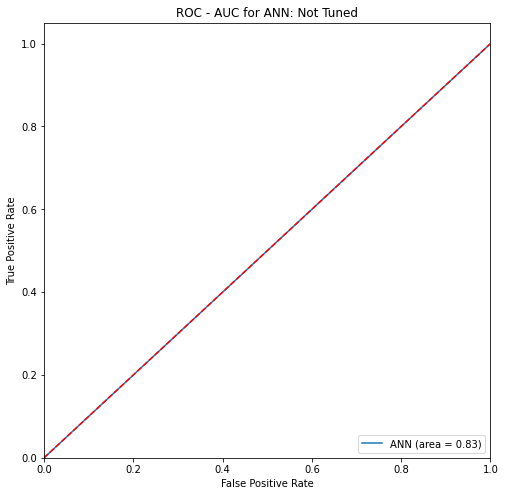

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

ANN_roc_auc = roc_auc_score(y_test, model.predict(X_test))
#fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (8,8))
plt.plot(fpr, tpr, label='ANN (area = %0.2f)' % ANN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - AUC for ANN: Not Tuned')
plt.legend(loc="lower right")
plt.savefig('ANN_ROC')
plt.show()

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
rf_pred = rf.predict(X_test)

In [ ]:
# Evaluation 
from sklearn import metrics
from sklearn.metrics import classification_report 

report = classification_report(y_test, rf_pred, digits = 4)
print(report)

              precision    recall  f1-score   support

           0     0.9460    0.9989    0.9717       929
           1     0.0000    0.0000    0.0000        53

    accuracy                         0.9450       982
   macro avg     0.4730    0.4995    0.4859       982
weighted avg     0.8949    0.9450    0.9193       982



Text(0.5, 0, 'False Positive Rate')

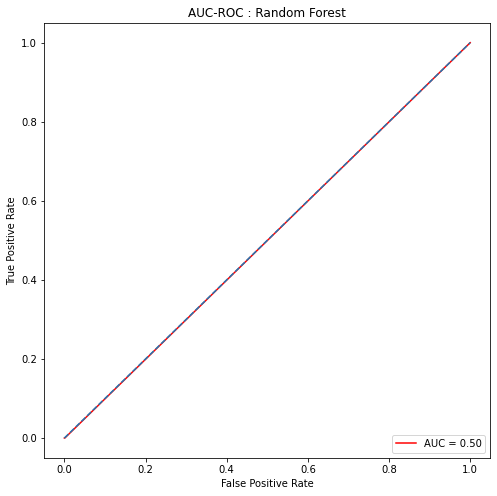

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

rf_auc = roc_auc_score(y_test, rf_pred)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, rf_pred)

plt.figure(figsize = (8,8))
plt.title('AUC-ROC : Random Forest')
plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.2f' % rf_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

###Genetic Algorithm with Neural Network

In [ ]:
!pip install pygad

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 56 kB 3.1 MB/s 


In [ ]:
import pygad
import pygad.nn
import pygad.gann

In [ ]:
def fitness_func(solution, sol_idx):
    global GANN_instance, data_inputs, data_outputs
    predictions = pygad.nn.predict(last_layer=GANN_instance.population_networks[sol_idx],data_inputs=data_inputs, problem_type="classification")
    correct_predictions = np.where(predictions == data_outputs)[0].size
    solution_fitness = (correct_predictions/data_outputs.size)*100
    return solution_fitness

def callback_generation(ga_instance):
    global GANN_instance
    population_matrices = pygad.gann.population_as_matrices(population_networks=GANN_instance.population_networks, population_vectors=ga_instance.population)
    GANN_instance.update_population_trained_weights(population_trained_weights=population_matrices)
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Accuracy   = {fitness}%".format(fitness=ga_instance.best_solution()[1]))

In [ ]:
data_inputs = np.array(X_train)
data_outputs = np.array(y_train)

In [ ]:
GANN_instance = pygad.gann.GANN(num_solutions=5,
                                num_neurons_input=data_inputs.shape[1],
                                num_neurons_hidden_layers=[2],
                                num_neurons_output=2,
                                hidden_activations=["relu"],
                                output_activation="sigmoid")

In [ ]:
population_vectors = pygad.gann.population_as_vectors(population_networks=GANN_instance.population_networks)

In [ ]:
ga_instance = pygad.GA(num_generations=100,
                       num_parents_mating=2,
                       initial_population=population_vectors.copy(),
                       fitness_func=fitness_func,
                       mutation_percent_genes=5,
                       callback_generation=callback_generation)

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:764: UserWarning: Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.
  if not self.suppress_warnings: warnings.warn("Starting from PyGAD 2.6.0, the callback_generation parameter is deprecated and will be removed in a later release of PyGAD. Please use the on_generation parameter instead.")


In [ ]:
ga_instance.run()

Generation = 1
Accuracy   = 96.02649006622516%
Generation = 2
Accuracy   = 96.02649006622516%
Generation = 3
Accuracy   = 96.02649006622516%
Generation = 4
Accuracy   = 96.02649006622516%
Generation = 5
Accuracy   = 96.02649006622516%
Generation = 6
Accuracy   = 96.02649006622516%
Generation = 7
Accuracy   = 96.02649006622516%
Generation = 8
Accuracy   = 96.02649006622516%
Generation = 9
Accuracy   = 96.02649006622516%
Generation = 10
Accuracy   = 96.02649006622516%
Generation = 11
Accuracy   = 96.02649006622516%
Generation = 12
Accuracy   = 96.02649006622516%
Generation = 13
Accuracy   = 96.02649006622516%
Generation = 14
Accuracy   = 96.02649006622516%
Generation = 15
Accuracy   = 96.02649006622516%
Generation = 16
Accuracy   = 96.02649006622516%
Generation = 17
Accuracy   = 96.02649006622516%
Generation = 18
Accuracy   = 96.02649006622516%
Generation = 19
Accuracy   = 96.02649006622516%
Generation = 20
Accuracy   = 96.02649006622516%
Generation = 21
Accuracy   = 96.02649006622516%
G

/usr/local/lib/python3.8/dist-packages/pygad/pygad.py:3345: UserWarning: Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.
  warnings.warn("Please use the plot_fitness() method instead of plot_result(). The plot_result() method will be removed in the future.")


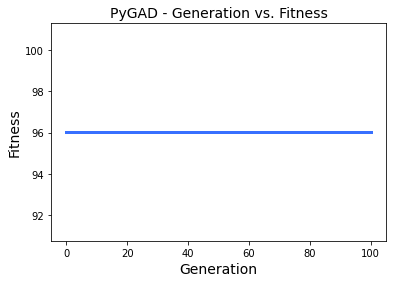

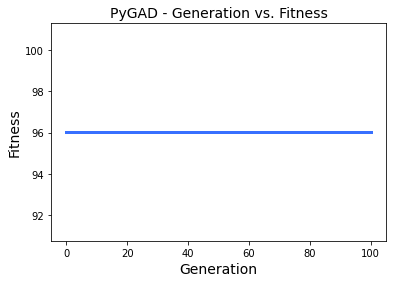

In [ ]:
ga_instance.plot_result()

In [ ]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(solution)
print(solution_fitness)
print(solution_idx)

[-1.79053754 -2.70461835 -1.51449629  0.31167045  1.63874937 -0.56545552
 -0.66236867  0.76608781  0.72863798  2.33844304 -0.13952843  1.89678743
  1.15308593 -1.04369857  0.47734777 -1.38395484  0.07203721  0.33676213
  1.90359566 -1.87735568  1.96313071 -0.6757265  -0.43964222  0.05569234
 -1.18474574 -0.71349909 -1.53481172 -1.27824927  0.08337326  0.64391736
 -0.28930917  1.79946004 -0.33937705 -0.08743925  0.91611101  0.81967086
  0.53334086  1.64582589 -1.33529636 -0.22228826]
96.02649006622516
0


In [ ]:
print("Best solution (Accuracy) for GANN without Class Balancing:", solution_fitness)

Best solution (Accuracy) for GANN without Class Balancing: 96.02649006622516
